In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
data = loadmat(r'C:\Users\saminens\Desktop\ML\ex3data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [2]:
weights=loadmat(r'C:\Users\saminens\Desktop\ML\ex3weights.mat')
weights.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [3]:
X=data['X']
y=data['y'].ravel()
m,n=X.shape

In [4]:

#x matrix is 5000 images, each image being a flattened 20X20 pixels.
#flattened being, rows being appended one next to the other
x=np.hstack((np.ones((m,1)),X))


In [5]:
t1,t2=weights['Theta1'],weights['Theta2']
t2.shape

(10, 26)

In [6]:
sd=np.random.choice(x.shape[0],10)
sd

array([4397, 2940,  653, 4117, 1805, 4241, 1934, 3070, 1861,  743])

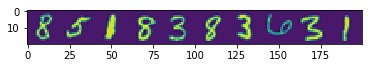

In [7]:
pt.imshow(x[sd,1:].reshape(-1,20).T)


In [8]:
def costfunction(theta,X,y,lamda): #use regularised logistic regression
    m,n = X.shape
    h=sigmoid(X.dot(theta))
    
    cost=1/m * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    reg=lamda/(2*m) * np.sum(np.square((theta[1:])))
    J=cost+reg
    
    grad= 1/m * ((h-y).T.dot(X)).T + lamda/m * np.r_[[[0]],theta[1:].reshape(-1,1)].T
    return J,grad.flatten()

In [9]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [10]:
#test
thet=np.array([-2,-1,1,2])
xt = np.hstack((np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F') / 10.0))
yt = np.array([1, 0, 1, 0, 1])
lamt = 3
costfunction(thet,xt,yt,lamt)
#on your face cost function! this time I got you right !

(2.5348193961097438,
 array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296]))

In [11]:
#one vs all training
import scipy.optimize as opt
def one_vs_all(X,y,num_labels,lamda):
    m,n=X.shape
    all_theta=np.zeros((num_labels, n+1))
    initial_theta=np.zeros(n+1)
    X=np.hstack((np.ones((m,1)),X))
    #the labeling starts from 1, hence i=0 is assigned label=10   
    for i in range(0,10):
        if i==0:
            label=10
        else:
            label=i
        result = opt.minimize(costfunction, initial_theta, args=(X , (y == label).astype(int),lamda), method='TNC',
                       jac=True)
        #check the success labels to know if the used optimization works well.
        print ('one_vs_all(): label =', label, ', success =', result.success)
        all_theta[i,:]=result.x
            
    return all_theta
    


In [12]:
alltheta=one_vs_all(X,y,10,0.1)

one_vs_all(): label = 10 , success = True
one_vs_all(): label = 1 , success = True
one_vs_all(): label = 2 , success = True
one_vs_all(): label = 3 , success = True
one_vs_all(): label = 4 , success = True
one_vs_all(): label = 5 , success = True
one_vs_all(): label = 6 , success = True
one_vs_all(): label = 7 , success = True
one_vs_all(): label = 8 , success = True
one_vs_all(): label = 9 , success = True


In [13]:
def predict_one_vs_all(all_theta,X):
    m,n=X.shape
    X=np.hstack((np.ones((m,1)),X))
    #return the column index of the largest number in each row; since axis=1
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    p[p == 0] = 10
    return p
        

In [14]:
#one vs all prediction
pred=predict_one_vs_all(alltheta,X)
np.mean(pred==y)*100

96.460000000000008

In [15]:
#neural network prediction....clearly high!
def predict(theta1,theta2,X):
    m,n=X.shape 
    X=np.hstack((np.ones((m,1)),X))
    a2=sigmoid(X.dot(theta1.T))
    a2=np.hstack((np.ones((m,1)),a2))
    htheta=sigmoid(a2.dot(theta2.T))
    #we need to get the values 1 column later, since my 1st column is stacked with 1's
    return (np.argmax(htheta,axis=1)+1)

In [16]:
s=predict(t1,t2,X)
np.mean(s==y)*100


97.519999999999996

Displaying Example Image
Neural Network Prediction: [5] (digit [5])


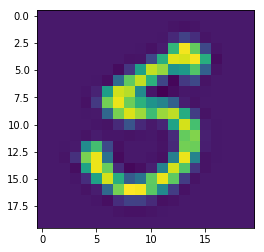

Displaying Example Image
Neural Network Prediction: [10] (digit [0])


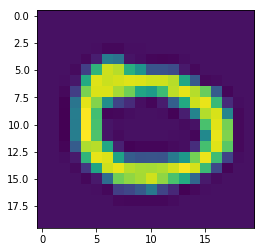

Displaying Example Image
Neural Network Prediction: [2] (digit [2])


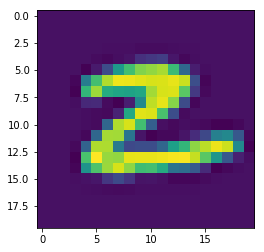

Displaying Example Image
Neural Network Prediction: [7] (digit [7])


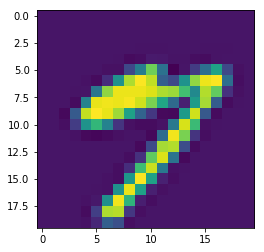

Displaying Example Image
Neural Network Prediction: [7] (digit [7])


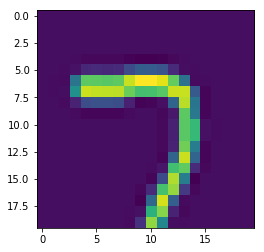

Displaying Example Image
Neural Network Prediction: [6] (digit [6])


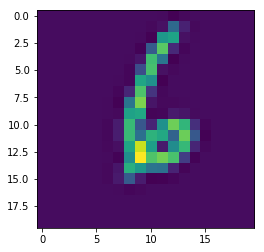

Displaying Example Image
Neural Network Prediction: [3] (digit [3])


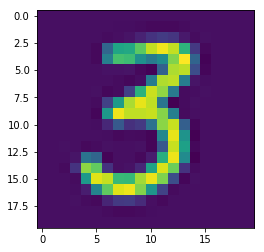

In [48]:
#output, change the number in range() to view
rp = np.random.permutation(m)
for i in range(7):
    print ('Displaying Example Image')
    pt.imshow(X[rp[i],].reshape(-1, 20).T)
    pred = predict(t1, t2, X[rp[i],].reshape(1, n))
    print ('Neural Network Prediction: {} (digit {})'.format(pred, pred % 10))
    pt.show()
